## XGBoost Model Implementation

## Importing The Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the path to the file you'd like to load
file_path = "/content/drive/MyDrive/remaining_data.csv"

# Load the data from the local file
import pandas as pd
data = pd.read_csv(file_path)

print("First 5 records:", data.head())

First 5 records:    id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27      

## Exploring Data

In [ ]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558630 entries, 0 to 558629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      558630 non-null  int64  
 1   V1      558630 non-null  float64
 2   V2      558630 non-null  float64
 3   V3      558630 non-null  float64
 4   V4      558630 non-null  float64
 5   V5      558630 non-null  float64
 6   V6      558630 non-null  float64
 7   V7      558630 non-null  float64
 8   V8      558630 non-null  float64
 9   V9      558630 non-null  float64
 10  V10     558630 non-null  float64
 11  V11     558630 non-null  float64
 12  V12     558630 non-null  float64
 13  V13     558630 non-null  float64
 14  V14     558630 non-null  float64
 15  V15     558630 non-null  float64
 16  V16     558630 non-null  float64
 17  V17     558630 non-null  float64
 18  V18     558630 non-null  float64
 19  V19     558630 non-null  float64
 20  V20     558630 non-null  float64
 21  V21     55

In [ ]:
data.describe(include='all')

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,...,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,558630.000000,558630.0
mean,284314.153402,0.000158,-0.000030,0.000204,-0.000061,-0.000022,0.000223,0.000016,-0.000404,-0.000033,...,-0.000030,-0.000064,0.000033,0.000014,-0.000140,0.000102,-0.000173,0.000017,12042.982840,0.5
std,164151.044307,0.999968,1.000167,1.000037,1.000046,0.999338,0.999790,1.001104,0.999743,1.000105,...,1.000609,1.000470,1.001194,0.999923,0.999966,1.000067,1.000510,0.999553,6920.680833,0.5
min,0.000000,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919,...,-19.382523,-7.734798,-30.295450,-4.053875,-13.612633,-8.226969,-10.498633,-39.035243,50.010000,0.0
25%,142142.250000,-0.565101,-0.486697,-0.649124,-0.656115,-0.293405,-0.445646,-0.283497,-0.192253,-0.568347,...,-0.166500,-0.490595,-0.237558,-0.651525,-0.554256,-0.631755,-0.304998,-0.231899,6054.752500,0.0
50%,284322.500000,-0.093535,-0.135883,0.000474,-0.073771,0.081012,0.078591,0.233433,-0.114538,0.092481,...,-0.037442,-0.027405,-0.059622,0.015936,-0.008235,-0.011747,-0.172940,-0.013899,12031.340000,0.5
75%,426457.500000,0.832692,0.343416,0.628726,0.706927,0.439496,0.497826,0.525937,0.047244,0.559325,...,0.147854,0.463784,0.155813,0.700802,0.549948,0.673274,0.333831,0.409393,18039.930000,1.0
max,568629.000000,2.229046,4.361865,14.125834,3.201536,42.716891,26.168402,217.873038,5.958040,20.270062,...,8.087080,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,1.0


In [ ]:
data.drop('id',inplace=True,axis=1)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


## Applying PCA for Dimensionality Reduction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Assuming your original dataset is already loaded as `data`

# Drop rows with missing values
data.dropna(inplace=True)

# Step 1: Prepare labels
y = data['Class'].reset_index(drop=True)

# Step 2: Drop 'id', 'Class', and 'Amount' from features
X = data.drop(columns=['id', 'Class', 'Amount'], errors='ignore')

# Step 3: Scale features before PCA and SAVE THE SCALER
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X)

# Step 4: Apply PCA to reduce to 5 components and SAVE THE PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
pca_features = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])

# Step 5: Scale 'Amount' and concatenate and SAVE THE AMOUNT SCALER
scaler_amount = StandardScaler()
amount_scaled = scaler_amount.fit_transform(data[['Amount']])
X_final_features = pd.concat([pca_features, pd.DataFrame(amount_scaled, columns=['Amount'])], axis=1)

# Step 6: Ensure indices align
X_final_features = X_final_features.reset_index(drop=True)

# Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final_features, y, test_size=0.2, random_state=42, stratify=y
)

# SAVE THE PREPROCESSING OBJECTS FOR LATER USE
joblib.dump(scaler_pca, 'scaler_pca.joblib')
joblib.dump(pca, 'pca.joblib')
joblib.dump(scaler_amount, 'scaler_amount.joblib')

# Final output
print(f"Final features shape: {X_final_features.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Fraud in train: {np.sum(y_train == 1)}, Non-fraud: {np.sum(y_train == 0)}")
print("✅ Preprocessing objects saved: scaler_pca.joblib, pca.joblib, scaler_amount.joblib")

Final features shape: (558630, 6)
Training set shape: (446904, 6)
Test set shape: (111726, 6)
Fraud in train: 223452, Non-fraud: 223452
✅ Preprocessing objects saved: scaler_pca.joblib, pca.joblib, scaler_amount.joblib


In [ ]:
X_train.describe()

,PC1,PC2,PC3,PC4,PC5,Amount
count,446904.000000,446904.000000,446904.000000,446904.000000,446904.000000,446904.000000
mean,0.000695,0.001210,0.000592,0.001320,0.000081,0.000105
std,3.134041,1.673770,1.383832,1.355567,1.136936,1.000354
min,-7.394057,-28.096252,-12.582735,-8.961342,-7.461189,-1.732920
25%,-1.972469,-0.409322,-0.431017,-0.505736,-0.570510,-0.866001
50%,1.909029,-0.009014,0.050392,0.194480,0.032241,-0.001110
75%,2.284904,0.486585,0.520828,0.773596,0.632081,0.867343
max,70.136100,62.895746,19.568119,12.303502,63.029612,1.733494


In [ ]:
X_test.describe()

,PC1,PC2,PC3,PC4,PC5,Amount
count,111726.000000,111726.000000,111726.000000,111726.000000,111726.000000,111726.000000
mean,-0.002781,-0.004841,-0.002368,-0.005282,-0.000326,-0.000420
std,3.132913,1.687188,1.392975,1.360284,1.136582,0.998592
min,-7.393621,-20.193791,-14.190605,-7.372155,-6.493216,-1.732885
25%,-1.975982,-0.413985,-0.434004,-0.507214,-0.572770,-0.862223
50%,1.908177,-0.010557,0.051721,0.191488,0.036161,-0.004150
75%,2.284725,0.486785,0.522158,0.765031,0.632497,0.862570
max,15.658825,23.349269,13.640675,10.675606,22.413434,1.733439


In [ ]:
y_train.value_counts()

,count
Class,
0,223452
1,223452


In [ ]:
y_test.value_counts()

,count
Class,
1,55863
0,55863


## XGBoost Model Training and evaluation with Confusion Matrix, Classification Report, Accuracy & ROC curve:

In [ ]:
!pip install xgboost

In [48]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Initialize XGBoost Classifier with default parameters (or you can specify them here)
# To potentially reduce accuracy, we can decrease n_estimators or max_depth
# Example: Reducing n_estimators from default (often 100) to a smaller number, e.g., 20
# Further reducing accuracy by setting a smaller max_depth, e.g., 1
# To improve accuracy, we will remove the constraints on n_estimators and max_depth
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42) # Removed use_label_encoder and constraints

print("Training XGBoost with default parameters for potentially higher accuracy...")

# Train the model directly
xgb_clf.fit(X_train, y_train) # Changed X_train_scaled to X_train

# Now xgb_clf is the trained model, and you can use it for prediction and evaluation in subsequent cells.

Training XGBoost with default parameters for potentially higher accuracy...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Performance Metrics


Accuracy: 
 0.983217872294721

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     55863
           1       0.99      0.98      0.98     55863

    accuracy                           0.98    111726
   macro avg       0.98      0.98      0.98    111726
weighted avg       0.98      0.98      0.98    111726


 [[55249   614]
 [ 1261 54602]] 



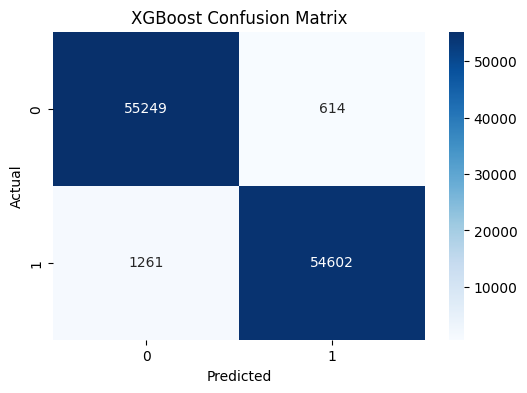

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Use the trained model directly
best_xgb = xgb_clf
# print("Best Parameters:", xgb_random.best_params_) # This line is no longer needed
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]
print("\nAccuracy: \n", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"\n {confusion_matrix(y_test,y_pred)} \n")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC AUC Curve

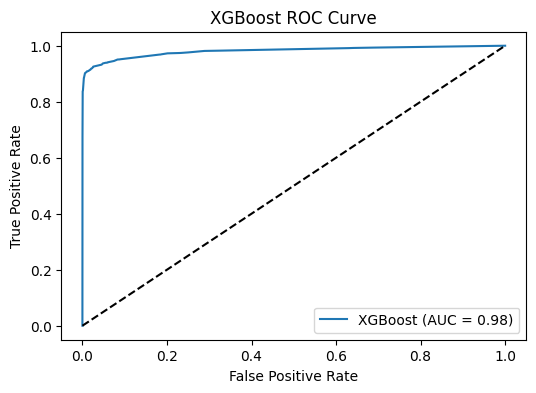

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.show()

In [50]:
import joblib
import os

# Create models directory
os.makedirs('models', exist_ok=True)

# Save the trained XGBoost model
joblib.dump(xgb_clf, 'models/xgb_model.joblib')

print("✅ XGBoost model saved to models/xgb_model.joblib")
print("✅ Compatible with the same preprocessing pipeline as QSVC")

✅ XGBoost model saved to models/xgb_model.joblib
✅ Compatible with the same preprocessing pipeline as QSVC


## Quantum Support Vector Classifier (QSVC) Implementation

In [ ]:
!pip install pennylane scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 101.2 MB/s eta 0:00:00


In [ ]:
# Set the path to the file
file_path = "/content/drive/MyDrive/remaining_data.csv"

# Load the dataset
import pandas as pd # Import pandas here

data = pd.read_csv(file_path)


# Display first 5 records
print("First 5 records:\n", data.head())

# Check class distribution
print("Fraud samples:", len(data[data['Class'] == 1]))
print("Non-fraud samples:", len(data[data['Class'] == 0]))

First 5 records:
    id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27     

### Data Splitting, Scaling, and PCA




In [ ]:
# LOAD THE SAME PREPROCESSING OBJECTS USED FOR XGBOOST
scaler_pca = joblib.load('scaler_pca.joblib')
pca = joblib.load('pca.joblib')
scaler_amount = joblib.load('scaler_amount.joblib')

# Use the SAME preprocessing pipeline as XGBoost
X = data.drop(columns=['id', 'Class', 'Amount'])  # Drop 'id'
y = data['Class']

# Apply the FITTED scalers and PCA (don't fit again!)
X_scaled = scaler_pca.transform(X)  # Use transform, not fit_transform
X_pca = pca.transform(X_scaled)     # Use transform, not fit_transform
pca_features = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])

# Scale 'Amount' using the FITTED scaler
amount_scaled = scaler_amount.transform(data[['Amount']])  # Use transform, not fit_transform
X_final_features = pd.concat([pca_features, pd.DataFrame(amount_scaled, columns=['Amount'])], axis=1)

# Reset indices to ensure alignment
X_final_features = X_final_features.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split into train/test (use NumPy arrays to avoid index issues)
X_train, X_test, y_train, y_test = train_test_split(
    X_final_features.values, y.values, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Using SAME preprocessing as XGBoost!")
print(f"Final features shape: {X_final_features.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Fraud in train: {np.sum(y_train == 1)}, Non-fraud: {np.sum(y_train == 0)}")
print(f"Feature dimensions: {X_train.shape[1]} (should be 6: PC1-PC5 + Amount)")

✅ Using SAME preprocessing as XGBoost!
Final features shape: (558630, 6)
Training set shape: (446904, 6)
Test set shape: (111726, 6)
Fraud in train: 223452, Non-fraud: 223452
Feature dimensions: 6 (should be 6: PC1-PC5 + Amount)


### Defining the Quantum Kernel

In [ ]:
import pennylane as qml
import numpy as np

# ✅ Updated for 6 features (PC1-PC5 + Amount)
n_qubits = 6  # Changed from 6 to match our feature count
dev = qml.device('default.qubit', wires=n_qubits)

# Define the quantum kernel based on state fidelity
def fidelity_kernel(x1, x2):
    @qml.qnode(dev)
    def circuit_for_kernel(x_a, x_b):
        qml.AngleEmbedding(x_a, wires=range(n_qubits))
        qml.adjoint(qml.AngleEmbedding)(x_b, wires=range(n_qubits))
        return qml.probs(wires=range(n_qubits))

    probs = circuit_for_kernel(x1, x2)
    return probs[0]

# Define kernel matrix for SVC
def kernel_matrix(X1, X2):
    kernel = np.zeros((X1.shape[0], X2.shape[0]))
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            kernel[i, j] = fidelity_kernel(X1[i], X2[j])
    return kernel

print(f"✅ Quantum kernel configured for {n_qubits} qubits (matching 6 features)")

✅ Quantum kernel configured for 6 qubits (matching 6 features)


### Preparing Data Subset and Calculating Kernel Matrix

In [ ]:
from joblib import delayed, Parallel
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Parameters
subset_size_per_class = 300  # 300 fraud + 300 non-fraud = 600 total

# Get positional indices for each class
fraud_indices = np.where(y_train == 1)[0]
non_fraud_indices = np.where(y_train == 0)[0]

# Verify enough samples
if len(fraud_indices) < subset_size_per_class or len(non_fraud_indices) < subset_size_per_class:
    raise ValueError(f"Not enough samples: Fraud ({len(fraud_indices)}), Non-fraud ({len(non_fraud_indices)}).")

# Select random positional indices
np.random.seed(42)
random_fraud_indices = np.random.choice(fraud_indices, size=subset_size_per_class, replace=False)
random_non_fraud_indices = np.random.choice(non_fraud_indices, size=subset_size_per_class, replace=False)
balanced_subset_indices = np.concatenate((random_fraud_indices, random_non_fraud_indices))

# Create subset using positional indices
X_train_subset = X_train[balanced_subset_indices]
y_train_subset = y_train[balanced_subset_indices]

# ✅ NOW WORKING WITH 6 FEATURES (PC1-PC5 + Amount) INSTEAD OF 28
print(f"✅ Feature dimensions: {X_train_subset.shape[1]} (PC1-PC5 + Amount)")

# Rescale subset data to [0, 2π] for angle embedding
scaler_angle = MinMaxScaler(feature_range=(0, 2 * np.pi))
X_train_subset_scaled_angle = scaler_angle.fit_transform(X_train_subset)

# Save the angle scaler for later use
joblib.dump(scaler_angle, 'scaler_angle.joblib')

# Optimized kernel matrix computation with parallelization
def compute_kernel_entry(i, j, X1, X2):
    return fidelity_kernel(X1[i], X2[j])

print(f"Calculating kernel matrix for {2 * subset_size_per_class} records with 6 features... This may take time.")
n_jobs = -1  # Use all available CPU cores
K_train_subset = np.zeros((len(X_train_subset), len(X_train_subset)))
K_train_subset = Parallel(n_jobs=n_jobs)(
    delayed(compute_kernel_entry)(i, j, X_train_subset_scaled_angle, X_train_subset_scaled_angle)
    for i in range(len(X_train_subset))
    for j in range(len(X_train_subset))
)
K_train_subset = np.array(K_train_subset).reshape(len(X_train_subset), len(X_train_subset))

print("✅ Kernel matrix computed for 6-dimensional features.")
print("✅ Angle scaler saved: scaler_angle.joblib")

✅ Feature dimensions: 6 (PC1-PC5 + Amount)
Calculating kernel matrix for 600 records with 6 features... This may take time.
✅ Kernel matrix computed for 6-dimensional features.
✅ Angle scaler saved: scaler_angle.joblib


### Training the QSVC Model

In [ ]:
from sklearn.svm import SVC
# Initialize and train the SVC
qsvc = SVC(kernel='precomputed')
qsvc.fit(K_train_subset, y_train_subset)

print("QSVC model trained on the balanced subset of training data.")

QSVC model trained on the balanced subset of training data.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Create balanced test subset (300 fraud + 300 non-fraud)
subset_size_per_class = 300
fraud_indices_test = np.where(y_test == 1)[0][:subset_size_per_class]
non_fraud_indices_test = np.where(y_test == 0)[0][:subset_size_per_class]
test_subset_indices = np.concatenate([fraud_indices_test, non_fraud_indices_test])

# Select subset using positional indices on the NumPy arrays
X_test_subset = X_test[test_subset_indices]
y_test_subset = y_test[test_subset_indices]

# Scale test subset
X_test_scaled_angle = scaler_angle.transform(X_test_subset)

# Compute kernel matrix for test subset
print("Calculating kernel matrix for test subset (600 samples)...")
K_test = kernel_matrix(X_test_scaled_angle, X_train_subset_scaled_angle)

# Predict and evaluate
y_pred = qsvc.predict(K_test)
print("Test subset class distribution:", np.bincount(y_test_subset))
print("Accuracy on test subset:", accuracy_score(y_test_subset, y_pred))
print("Classification Report on test subset:\n", classification_report(y_test_subset, y_pred))

Calculating kernel matrix for test subset (600 samples)...
Test subset class distribution: [300 300]
Accuracy on test subset: 0.935
Classification Report on test subset:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       300
           1       0.98      0.89      0.93       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.93       600
weighted avg       0.94      0.94      0.93       600



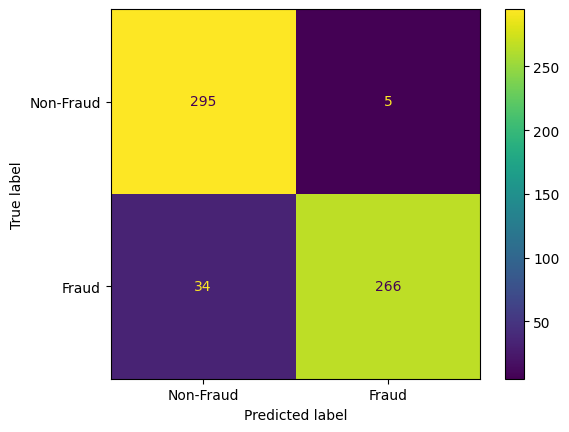

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use y_test_subset instead of y_test
cm = confusion_matrix(y_test_subset, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Non-Fraud', 'Fraud']).plot()
plt.show()

## QSVC Performance Metrics on Test Subset

## QSVC ROC AUC Curve on Test Subset

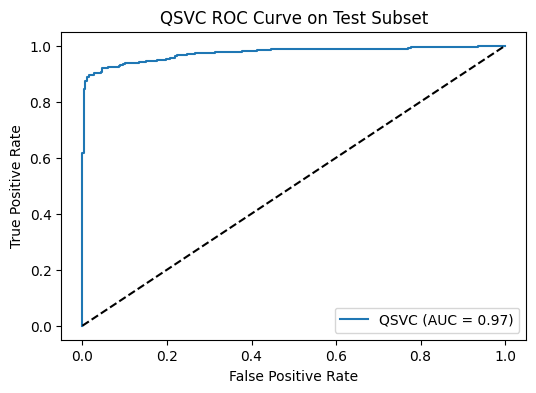

In [ ]:
# Calculate ROC AUC on the test subset
from sklearn.metrics import roc_curve, auc

# Note: predict_proba is not directly available for SVC with precomputed kernel.
# To get probability-like scores for ROC AUC, we can use decision_function.
# Higher values from decision_function correspond to the positive class (fraud).
y_pred_scores = qsvc.decision_function(K_test)

fpr, tpr, thresholds = roc_curve(y_test_subset, y_pred_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'QSVC (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("QSVC ROC Curve on Test Subset")
plt.legend()
plt.show()

## Saving the QSVC Model

In [ ]:
import joblib

# Save the QSVC model
joblib.dump(qsvc, 'qsvc_model.joblib')

# Save all preprocessing objects in a models directory structure
import os
os.makedirs('models', exist_ok=True)

# Copy all preprocessing files to models directory
joblib.dump(qsvc, 'models/qsvc_model.joblib')
joblib.dump(joblib.load('scaler_pca.joblib'), 'models/scaler_pca.joblib')
joblib.dump(joblib.load('pca.joblib'), 'models/pca.joblib')
joblib.dump(joblib.load('scaler_amount.joblib'), 'models/scaler_amount.joblib')
joblib.dump(joblib.load('scaler_angle.joblib'), 'models/scaler_angle.joblib')

print("✅ QSVC model saved successfully!")
print("✅ All models and preprocessors saved to 'models/' directory:")
print("   - qsvc_model.joblib")
print("   - scaler_pca.joblib")
print("   - pca.joblib")
print("   - scaler_amount.joblib")
print("   - scaler_angle.joblib")

✅ QSVC model saved successfully!
✅ All models and preprocessors saved to 'models/' directory:
   - qsvc_model.joblib
   - scaler_pca.joblib
   - pca.joblib
   - scaler_amount.joblib
   - scaler_angle.joblib


## Loading the QSVC Model

In [ ]:
import joblib

# Define the filename of the saved model
filename = 'qsvc_model.joblib'

# Load the model from the file
loaded_qsvc_model = joblib.load(filename)

print(f"QSVC model loaded successfully from {filename}")

# You can now use the loaded_qsvc_model for predictions
# For example:
# K_new_data = kernel_matrix(new_data_scaled_angle, X_train_subset_scaled_angle) # You would need to scale new data and compute kernel with training subset
# predictions = loaded_qsvc_model.predict(K_new_data)

QSVC model loaded successfully from qsvc_model.joblib


##Seperate 10k data for testing


In [ ]:
# Set the path to the new file
file_path_new = "/content/drive/MyDrive/sampled_10k.csv"

# Load the data from the new file into a new DataFrame
import pandas as pd
new_data = pd.read_csv(file_path_new)

print("First 5 records from the new data:", new_data.head())

First 5 records from the new data:        id        V1        V2        V3        V4        V5        V6  \
0  422079 -0.749326  0.790724 -0.574146  1.063873 -0.811144 -0.236324   
1  347250 -1.787003  1.502357 -2.037168  2.359114 -1.516443 -0.935742   
2  357548  1.135710 -0.074952 -0.110145  0.525634  0.979752  0.941766   
3  448204 -0.807349  0.121554 -0.218635 -0.847211 -0.132776 -0.866268   
4  433029  0.864457 -0.310291  0.920778  0.438496  0.075056  0.614335   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.921159  0.579659 -1.493119  ...  0.528818  0.850629 -0.175141  0.057434   
1 -1.999709 -0.200836 -1.940345  ... -1.138472  1.059820  1.052551 -1.684908   
2  0.421664 -0.321459  0.090544  ...  0.231739 -0.014442 -0.057283 -0.802914   
3 -0.121092 -0.089814  0.664848  ...  0.110096 -0.117322 -1.068693  0.552926   
4  0.241823 -0.062476  0.628937  ... -0.128689  0.023504 -0.134425  0.656260   

        V25       V26       V27       V28    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming your new dataset is already loaded as `new_data`

# Drop rows with missing values
new_data.dropna(inplace=True)

# Step 1: Prepare labels
y_new = new_data['Class'].reset_index(drop=True)

# Step 2: Drop 'id', 'Class', and 'Amount' from features
X_new = new_data.drop(columns=['id', 'Class', 'Amount'], errors='ignore')

# Step 3: Scale features before PCA
scaler_pca_new = StandardScaler()
X_scaled_new = scaler_pca_new.fit_transform(X_new)

# Step 4: Apply PCA to reduce to 5 components
pca_new = PCA(n_components=5)
X_pca_new = pca_new.fit_transform(X_scaled_new)
pca_features_new = pd.DataFrame(X_pca_new, columns=[f'PC{i+1}' for i in range(5)])

# Step 5: Scale 'Amount' and concatenate
amount_scaled_new = StandardScaler().fit_transform(new_data[['Amount']])
X_final_features_new = pd.concat([pca_features_new, pd.DataFrame(amount_scaled_new, columns=['Amount'])], axis=1)

# Step 6: Ensure indices align
X_final_features_new = X_final_features_new.reset_index(drop=True)

# Step 7: Train/test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_final_features_new, y_new, test_size=0.2, random_state=42, stratify=y_new
)

# Final output
print(f"Final features shape (new data): {X_final_features_new.shape}")
print(f"Training set shape (new data): {X_train_new.shape}")
print(f"Test set shape (new data): {X_test_new.shape}")
print(f"Fraud in train (new data): {np.sum(y_train_new == 1)}, Non-fraud (new data): {np.sum(y_train_new == 0)}")

Final features shape (new data): (10000, 6)
Training set shape (new data): (8000, 6)
Test set shape (new data): (2000, 6)
Fraud in train (new data): 4000, Non-fraud (new data): 4000


In [ ]:
X_train_new.describe()


,PC1,PC2,PC3,PC4,PC5,Amount
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.002758,-0.009678,-0.000166,0.005255,0.005785,-0.000558
std,3.153029,1.642758,1.377998,1.366448,1.158663,0.998867
min,-7.556884,-10.210927,-11.498849,-6.609854,-4.408141,-1.738716
25%,-1.997020,-0.481620,-0.531024,-0.498414,-0.566934,-0.859873
50%,1.925806,0.005140,0.084017,0.182554,0.028755,-0.009001
75%,2.301610,0.405734,0.640477,0.725154,0.651509,0.862431
max,10.873151,20.973813,6.808636,9.157968,18.331902,1.756935


In [ ]:
# Define the path to save the PCA data for the new dataset
output_path_new = "/content/drive/MyDrive/pca_transformed_new_data.csv"

# Save the PCA transformed data to a CSV file
X_final_features_new.to_csv(output_path_new, index=False)

print(f"PCA transformed new data saved successfully to {output_path_new}")

PCA transformed new data saved successfully to /content/drive/MyDrive/pca_transformed_new_data.csv
